For anyone interested I computed the **average number of PLA iterations** and the **average out of sample error** (disagreement between $f$ and $g$) for different training sizes. That way we can compare our programs and check if they behave the same.

I chose: 

- training sizes: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

I used 1000 runs to compute the average for each training size, and 1000 out of sample points to compute the disagreement between $f$ and $g$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rnd(n): 
    return np.random.uniform(-1, 1, size = n)


def get_E_out_iteration(num_data_points):

    RUNS = 1000
    iterations_total = 0
    ratio_mismatch_total = 0
    N_test = 1000
    N = num_data_points
    

    #--------------------------------------------------------------

    for run in range(RUNS):

        # choose two random points A, B in [-1,1] x [-1,1]
        A = rnd(2)
        B = rnd(2)

        # the line can be described by y = m*x + b where m is the slope
        m = (B[1] - A[1]) / (B[0] - A[0])
        b = B[1] - m * B[0]  
        w_f = np.array([b, m, -1])

        #-----------------------

        # Create N data points (x, y) from the target function
        X = np.transpose(np.array([np.ones(N), rnd(N), rnd(N)]))           # input
        y_f = np.sign(np.dot(X, w_f))                                      # output

        #----------------------------------------

        # choose hypothesis h

        w_h = np.zeros(3)                               # initialize weight vector for hypothesis h
        t = 0                                           # count number of iterations in PLA

        while True:
            # Start PLA
            y_h = np.sign(np.dot(X, w_h))               # classification by hypothesis
            comp = (y_h != y_f)                         # compare classification with actual data from target function
            wrong = np.where(comp)[0]                   # indices of points with wrong classification by hypothesis h

            if wrong.size == 0:
                break

            rnd_choice = np.random.choice(wrong)        # pick a random misclassified point

            # update weight vector (new hypothesis):
            w_h = w_h +  y_f[rnd_choice] * np.transpose(X[rnd_choice])
            t += 1

        iterations_total += t

        # ------------------------------------------

        # Calculate error
        # Create data "outside" of training data


        test_x0 = np.random.uniform(-1,1,N_test)
        test_x1 = np.random.uniform(-1,1,N_test)

        X_test = np.array([np.ones(N_test), test_x0, test_x1]).T

        y_target = np.sign(np.dot(X_test, w_f))
        y_hypothesis = np.sign(np.dot(X_test, w_h))

        ratio_mismatch = ((y_target != y_hypothesis).sum()) / N_test
        ratio_mismatch_total += ratio_mismatch

    #------------------------------------------------

    print("Size of training data: N = ", N, "points")

    iterations_avg = iterations_total / RUNS
    print("\nAverage number of PLA iterations over", RUNS, "runs: t_avg = ", iterations_avg)

    ratio_mismatch_avg = ratio_mismatch_total / RUNS
    print("\nAverage ratio for the mismatch between f(x) and h(x) outside of the training data:")
    print("P(f(x)!=h(x)) = E_out = ", ratio_mismatch_avg)

    print("\n------------------------------------\n")

    return (ratio_mismatch_avg, iterations_avg)



Size of training data: N =  10 points

Average number of PLA iterations over 1000 runs: t_avg =  9.916

Average ratio for the mismatch between f(x) and h(x) outside of the training data:
P(f(x)!=h(x)) = E_out =  0.106529

------------------------------------

Size of training data: N =  20 points

Average number of PLA iterations over 1000 runs: t_avg =  20.37

Average ratio for the mismatch between f(x) and h(x) outside of the training data:
P(f(x)!=h(x)) = E_out =  0.060321

------------------------------------

Size of training data: N =  30 points

Average number of PLA iterations over 1000 runs: t_avg =  31.845

Average ratio for the mismatch between f(x) and h(x) outside of the training data:
P(f(x)!=h(x)) = E_out =  0.041861

------------------------------------

Size of training data: N =  40 points

Average number of PLA iterations over 1000 runs: t_avg =  39.435

Average ratio for the mismatch between f(x) and h(x) outside of the training data:
P(f(x)!=h(x)) = E_out =  0.0312

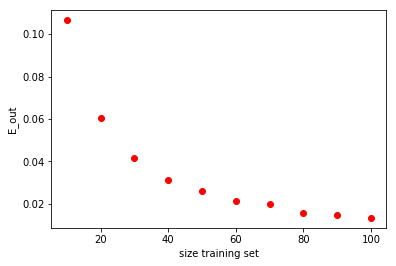

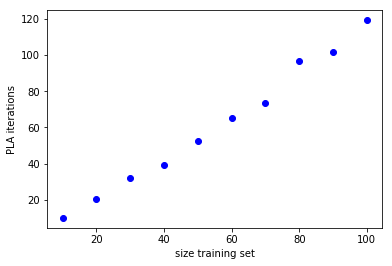

size training data:  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
PLA iterations:  [9.916, 20.37, 31.845, 39.435, 52.692, 65.188, 73.35, 96.432, 101.461, 119.21]
P(f(x)!=h(x)) = E_out =  [0.106529, 0.060320999999999937, 0.04186100000000003, 0.031248999999999968, 0.026309999999999972, 0.021416999999999999, 0.020152999999999938, 0.015779999999999964, 0.014779999999999962, 0.013423999999999976]


In [2]:
data_sizes = [10*i for i in range(1, 11)]
E_out, iterations = [], []

for size in data_sizes:
    ratio_mismatch_avg, iterations_avg = get_E_out_iteration(size)
    E_out.append(ratio_mismatch_avg)
    iterations.append(iterations_avg)

    
# https://matplotlib.org/users/pyplot_tutorial.html

plt.figure(1)
plt.plot(data_sizes, E_out, 'ro')
plt.ylabel("E_out")
plt.xlabel("size training set")
plt.savefig('E_out_vs_size_training_set.png')

plt.figure(2)
plt.plot(data_sizes, iterations, 'bo')
plt.ylabel("PLA iterations")
plt.xlabel("size training set")
plt.savefig('PLA_iterations_vs_size_training_set.png')

plt.show()

print("size training data: ", data_sizes)
print("PLA iterations: ", iterations)
print("P(f(x)!=h(x)) = E_out = ", E_out)